In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import re
import sys
import csv

In [2]:
import pandas as pd
import numpy as np
#import folium
#import json
import os

In [3]:
with open('./Data/32.세종시_행정경계(읍면동).geojson',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()

center = [36.599920, 127.298552]
m = folium.Map(location=center, zoom_start=11)

folium.Choropleth(
    geo_data=geo,
    fill_color='White',
).add_to(m)
m

### 정규표현식
* 정규표현식을 사용해 광고문구, 불필요한 기사 내용을 제거

In [3]:
def getBody(new_htmls):
    if new_htmls.select('#articleBodyContents'):
        body_ = new_htmls.select('#articleBodyContents')[0]
        pattern = '<script\s*[\s\S]*\s*</script>'
        body_ = re.sub(pattern,'',str(body_))
        body = bsp(body_,'html.parser').text.strip()

    elif new_htmls.select('#articeBody'):
        body_ = new_htmls.select('#articeBody')[0]
        pattern = '<script\s*[\s\S]*\s*</script>'
        body_ = re.sub(pattern,'',str(body_))
        body = bsp(body_,'html.parser').text.strip()

    elif new_htmls.select('#newsEndContents'):
        body_ = new_htmls.select('#newsEndContents > br')
        pattern = '<script\s*[\s\S]*\s*</script>'
        body_ = re.sub(pattern,'',str(body_))
        body = bsp(body_,'html.parser').text.strip()
        
    return body

### 본문 스크레이핑
* 네이버 뉴스에서 스크레이핑을 통해 기사 본문을 가져옴

In [4]:
def getText(url):
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
    res = requests.get(url,headers=headers)
    src = res.content.strip()
    htmls = bsp(src, 'html.parser')

    ul_list = htmls.select('div.info_group > a[class="info"]')
    for ul in ul_list:
        urls = ul['href']
        new_res = requests.get(urls, headers=headers)
        new_src = new_res.content.strip()
        new_htmls = bsp(new_src, 'html.parser')
        body = getBody(new_htmls)
        writer.writerow ( (body, urls, ) )
#         print(urls)

### 6년 간 뉴스 스크레이핑
* 2015년부터 2021년까지 '세종 부동산'이라는 키워드로 스크레이핑 진행

In [18]:
urlsrc = 'https://search.naver.com/search.naver?&where=news&query={0}&sm=tab_opt&sort=0&photo=0&field=0&reporter_article=&pd=3&ds={1}.01.01&de={1}.12.31&docid=&nso=so%3Ar%2Cp%3Afrom{1}0101to{1}1231%2Ca%3Aall&mynews=0&cluster_rank=38&start={2}&refresh_start=0'

for i in range(2019,2022):
    file = open(f"./sejong_text_{i}.csv",mode="w", encoding="utf-8",newline="")
    writer = csv.writer(file)
    writer.writerow( ('body', 'urls', ) )
    for j in range(401):
        url = urlsrc.format('라이브커머스%20상품',i, j*10+1)
        getText(url)
#         print(urls)
    print('-'*50)
    
    file.close()

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import sys
import csv
from konlpy.tag import Kkma, Hannanum 
from eunjeon import Mecab
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from os import path
import os
from collections import Counter
from PIL import Image

In [20]:
def total_word_cloud(csv):
    tf = pd.read_csv(f"{csv}",index_col=0)
    text = tf['key']
#     text.split()
    sejong_map = np.array(Image.open('./cloth.png'))
    #sejong_logo = np.array(Image.open('./Data/sejong_logo.jpg'))
    noun_text = ''
    FONT_PATH = 'C:/Windows/Fonts/malgun.ttf'
    for word in text:
        noun_text = noun_text + word
    # print(noun_text)
    wordcloud = WordCloud(max_font_size=40,max_words=2000,
                          font_path=FONT_PATH,mask=sejong_map,background_color='white',
                          width=1200,height=800).generate("".join(noun_text))
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()

In [21]:
def delkey(text):
    del(dictpos[text])
    sres = sorted(dictpos.items(), key=lambda x:x[1], reverse=True)
    return sres

In [22]:
#a2015 = pd.read_csv('./Data/sejong_text_2015.csv')
#a2016 = pd.read_csv('./Data/sejong_text_2016.csv')
# a2017 = pd.read_csv('./sejong_text_2017.csv')
# a2018 = pd.read_csv('./sejong_text_2018.csv')
a2019 = pd.read_csv('./sejong_text_2019.csv')
a2020 = pd.read_csv('./sejong_text_2020.csv')
a2021 = pd.read_csv('./sejong_text_2020.csv')

df = pd.concat([a2019,a2020,a2021],axis=0)
df = df.reset_index(drop='index')

In [23]:
%%time

mecab = Mecab()
p_list = []
for i in range(len(df)):
    p = mecab.pos(str(df.iloc[i]))
    p_list.append(p)
    
p_list1 = sum(p_list,[])
# p_list1

Wall time: 9.92 s


In [24]:
dictpos={}
# check = ['NNG', 'NNP', 'NNB', 'NNM', 'VV', 'VA', 'VXV', 'VXA'] # kkma
check = ['NNG','NNP']

for w, pos in p_list1:
    if pos in check:
        if (w in dictpos.keys()):
            dictpos[w] += 1
        else:
            dictpos[w] = 1
dictpos

{'스타': 54,
 '뉴스': 397,
 '기자': 1005,
 '사진': 196,
 '제공': 257,
 '애경': 3,
 '플라자': 26,
 '최근': 43,
 '급': 8,
 '성장': 51,
 '모바일': 265,
 '커머스': 1220,
 '방송': 621,
 '결과': 1,
 '실시간': 108,
 '주문': 18,
 '백화점': 250,
 '매대': 2,
 '습격': 2,
 '분새': 1,
 '박노현': 1,
 '컴': 4,
 '트루': 2,
 '테크놀로지': 2,
 '대표': 234,
 '제품': 99,
 '신뢰': 4,
 '증대': 4,
 '구매': 53,
 '전환': 30,
 '아이': 126,
 '전단지': 2,
 '대형': 16,
 '마트': 26,
 '마케팅': 51,
 '시장': 170,
 '바람': 5,
 '롯데마트': 19,
 '라이브': 1602,
 '퀴즈': 14,
 '플랫폼': 178,
 '잼': 67,
 '파트너': 42,
 '사': 27,
 '대상': 50,
 '판매': 323,
 '수수료': 11,
 '입': 14,
 '신세계': 94,
 '쇼핑': 816,
 '음악': 7,
 '기존': 15,
 '홈': 201,
 '부문': 58,
 '쇼크': 25,
 '개국': 2,
 '고객': 109,
 '올해': 61,
 '패션': 75,
 '트렌드': 62,
 '닷컴': 96,
 '서울': 401,
 '위크': 17,
 '참가': 4,
 '송지오': 1,
 '매출': 133,
 '시작': 55,
 '배': 52,
 '알리바바': 8,
 '주요': 25,
 '대학생': 9,
 '미디어': 86,
 '출연': 35,
 '중소': 114,
 '벤처': 86,
 '기업': 181,
 '부': 88,
 '상공': 75,
 '지원': 60,
 '퀴즈쇼': 16,
 '입지': 1,
 '드라마': 16,
 '콘텐츠': 162,
 '안': 3,
 '업계': 157,
 '연간': 7,
 '흑자': 8,
 '달성': 13,
 '순항': 1,
 

In [25]:
sres = sorted(dictpos.items(), key=lambda x:x[1], reverse=True)
sres

[('라이브', 1602),
 ('커머스', 1220),
 ('기자', 1005),
 ('쇼핑', 816),
 ('방송', 621),
 ('서울', 401),
 ('뉴스', 397),
 ('카카오', 379),
 ('상품', 369),
 ('네이버', 363),
 ('판매', 323),
 ('코로나', 274),
 ('모바일', 265),
 ('롯데', 264),
 ('제공', 257),
 ('백화점', 250),
 ('경제', 247),
 ('대표', 234),
 ('온라인', 221),
 ('진행', 212),
 ('홈', 201),
 ('투데이', 200),
 ('머니', 197),
 ('사진', 196),
 ('브랜드', 190),
 ('기업', 181),
 ('플랫폼', 178),
 ('코리아', 177),
 ('뉴시스', 174),
 ('시장', 170),
 ('콘텐츠', 162),
 ('업계', 157),
 ('운영', 153),
 ('오후', 152),
 ('지디', 146),
 ('넷', 146),
 ('디지털', 140),
 ('최초', 137),
 ('서비스', 135),
 ('현대', 134),
 ('매출', 133),
 ('채널', 132),
 ('아시아', 131),
 ('티몬', 131),
 ('아이', 126),
 ('중소', 114),
 ('국내', 113),
 ('데일리', 111),
 ('택트', 110),
 ('고객', 109),
 ('실시간', 108),
 ('유통', 108),
 ('플', 106),
 ('전문', 102),
 ('동영상', 101),
 ('제품', 99),
 ('할인', 99),
 ('한국', 97),
 ('닷컴', 96),
 ('소개', 96),
 ('소비', 95),
 ('신세계', 94),
 ('사업', 94),
 ('뷰티', 91),
 ('안희정', 89),
 ('부', 88),
 ('확대', 88),
 ('세대', 88),
 ('미디어', 86),
 ('벤처', 86),
 ('시청', 86),


In [35]:
delkey('매경')

KeyError: '매경'

In [26]:
data = pd.DataFrame.from_dict(dictpos,orient='index').rename(columns={0:'counts'})
data = data.reset_index()
data.columns=['key','counts']
data['y'] = 'none'
# data

In [27]:
data1 = data.groupby(by='y',as_index=True).agg(lambda x : ','.join(x))
# data1

In [28]:
data1.to_csv('./sejong_mecab.csv')

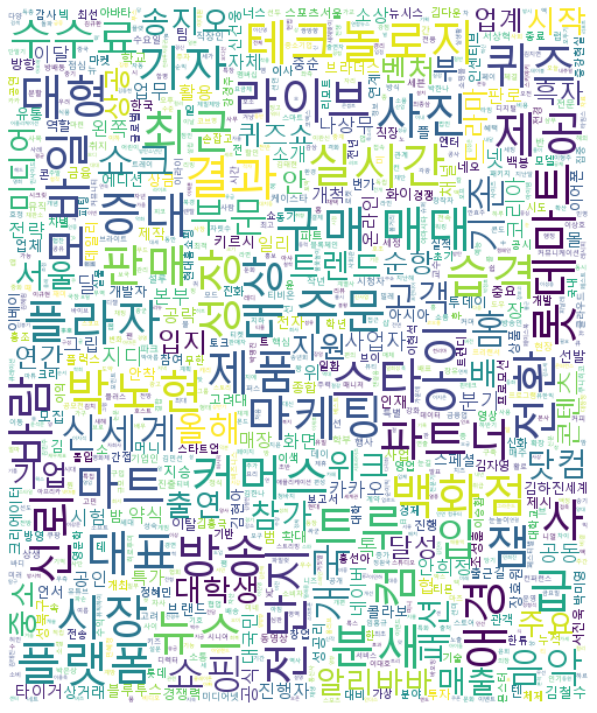

In [29]:
total_word_cloud('./sejong_mecab.csv')